# Project on Data Sciences and Machine Learning

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [211]:
# Load dataset
df = pd.read_csv('diabetic_data.csv')

# View first few rows
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
df.shape

(101766, 50)

In [8]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [200]:
df.duplicated().value_counts()

False    101766
Name: count, dtype: int64

In [212]:
df.replace('?', np.nan, inplace=True)

In [213]:
def feature_summary(df,val_sum):
    summary_df = pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-Null Count': df.notnull().sum(),
        'Null Count': df.isnull().sum(),
        'Null Percentage' : round(df.isnull().sum() / df.shape[0] *100 , 2),
        'Unique Count': df.nunique(),
        'Min': df.min(numeric_only=True),
        'Max': df.max(numeric_only=True)
    })

    summary_df = summary_df.sort_values(by=val_sum, ascending=False)
    
    return summary_df

In [214]:

feature_summary(df,'Null Count').head(20)

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
weight,object,3197,98569,96.86,9,NaN,NaN
max_glu_serum,object,5346,96420,94.75,3,NaN,NaN
A1Cresult,object,17018,84748,83.28,3,NaN,NaN
medical_specialty,object,51817,49949,49.08,72,NaN,NaN
payer_code,object,61510,40256,39.56,17,NaN,NaN
race,object,99493,2273,2.23,5,NaN,NaN
diag_3,object,100343,1423,1.40,789,NaN,NaN
diag_2,object,101408,358,0.35,748,NaN,NaN
diag_1,object,101745,21,0.02,716,NaN,NaN
tolbutamide,object,101766,0,0.00,2,NaN,NaN


The features to drop
1. 96.86% of the population's 'weight' is not available
2. 'medical_specialty' and 'payer_code' are not available for about 50%. And these are not relevant


In [215]:
#Dropping features
df=df.drop(['weight','medical_specialty','payer_code'], axis = 1)


In [216]:
feature_summary(df,'Unique Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
encounter_id,int64,101766,0,0.00,101766,12522.0,443867222.0
patient_nbr,int64,101766,0,0.00,71518,135.0,189502619.0
diag_3,object,100343,1423,1.40,789,NaN,NaN
diag_2,object,101408,358,0.35,748,NaN,NaN
diag_1,object,101745,21,0.02,716,NaN,NaN
num_lab_procedures,int64,101766,0,0.00,118,1.0,132.0
num_medications,int64,101766,0,0.00,75,1.0,81.0
number_outpatient,int64,101766,0,0.00,39,0.0,42.0
number_emergency,int64,101766,0,0.00,33,0.0,76.0
discharge_disposition_id,int64,101766,0,0.00,26,1.0,28.0


The features to drop
1. 'citoglipton' and 'examide' - all values are same
2. all values of 'encounter_id' column are unique

In [232]:
df=df.drop(['citoglipton','examide','encounter_id'],axis=1)

In [219]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [224]:
df.race.value_counts(dropna=False)

race
Caucasian          76099
AfricanAmerican    19210
NaN                 2271
Hispanic            2037
Other               1505
Asian                641
Name: count, dtype: int64

There are 2273 instances without race which is 2.23% which can be dropped.

In [227]:
df = df.dropna(subset=['race'])

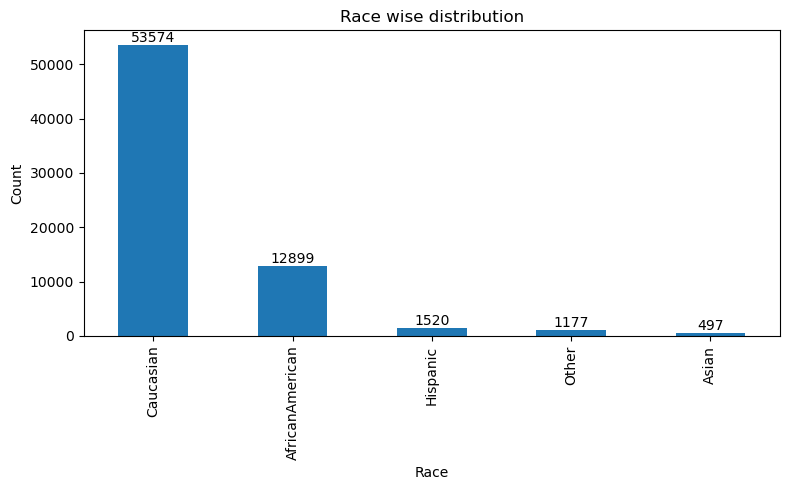

In [252]:
# Get value counts
race_counts = df['race'].value_counts()

# Create bar plot and capture Axes
ax = race_counts.plot(kind='bar', title='Race wise distribution', figsize=(8, 5))

# Add data labels on top of bars
for i, count in enumerate(race_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.xlabel('Race')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [233]:
feature_summary(df,'Null Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
max_glu_serum,object,5290,94202,94.68,3,NaN,NaN
A1Cresult,object,16596,82896,83.32,3,NaN,NaN
diag_3,object,98143,1349,1.36,786,NaN,NaN
diag_2,object,99156,336,0.34,745,NaN,NaN
diag_1,object,99473,19,0.02,714,NaN,NaN
number_outpatient,int64,99492,0,0.00,39,0.0,42.0
nateglinide,object,99492,0,0.00,4,NaN,NaN
num_lab_procedures,int64,99492,0,0.00,118,1.0,132.0
num_medications,int64,99492,0,0.00,75,1.0,81.0
num_procedures,int64,99492,0,0.00,7,0.0,6.0


In [ ]:
# total unique patients
len(df.patient_nbr), df.patient_nbr.nunique()

(99492, 69667)

In [235]:
# locate number of patient visits using patient_id
df.patient_nbr.value_counts()

patient_nbr
88785891     40
43140906     28
88227540     23
23199021     23
1660293      23
             ..
9788337       1
29974896      1
49159611      1
23304645      1
175429310     1
Name: count, Length: 69667, dtype: int64

In [236]:
# keep only one record for each patient, the first visit
df = df.drop_duplicates(['patient_nbr'], keep='first')

In [238]:
df.patient_nbr.nunique()

69667

In [237]:
df.shape

(69667, 44)

'patient_nbr' is unique, so we can drop this feature

In [239]:
df = df.drop('patient_nbr', axis=1)

In [240]:
df.shape

(69667, 43)

In [221]:
df.gender.value_counts(dropna=False)

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [222]:
gender_index = df[df.gender == 'Unknown/Invalid'].index
df = df.drop(gender_index, axis=0)

In [223]:
df.gender.value_counts(dropna=False)

gender
Female    54708
Male      47055
Name: count, dtype: int64

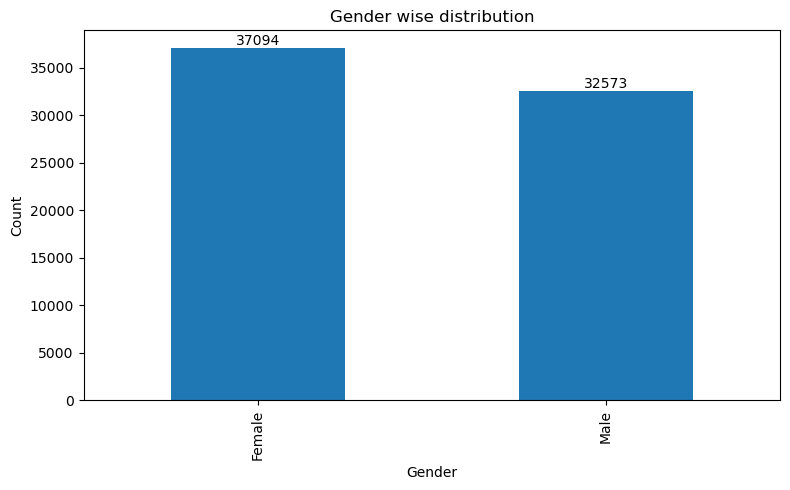

In [253]:
# Get value counts
gender_counts = df['gender'].value_counts()

# Create bar plot and capture Axes
ax = gender_counts.plot(kind='bar', title='Gender wise distribution', figsize=(8, 5))

# Add data labels on top of bars
for i, count in enumerate(gender_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [241]:
feature_summary(df,'Null Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
max_glu_serum,object,3414,66253,95.10,3,NaN,NaN
A1Cresult,object,12620,57047,81.89,3,NaN,NaN
diag_3,object,68507,1160,1.67,756,NaN,NaN
diag_2,object,69392,275,0.39,722,NaN,NaN
diag_1,object,69657,10,0.01,694,NaN,NaN
acetohexamide,object,69667,0,0.00,2,NaN,NaN
number_outpatient,int64,69667,0,0.00,33,0.0,42.0
nateglinide,object,69667,0,0.00,4,NaN,NaN
num_lab_procedures,int64,69667,0,0.00,116,1.0,132.0
num_medications,int64,69667,0,0.00,75,1.0,81.0


In [244]:
drop_cols=['admission_source_id','admission_type_id','glimepiride-pioglitazone','metformin-rosiglitazone','discharge_disposition_id']
df = df.drop(drop_cols, axis=1)

In [245]:
df.shape

(69667, 38)

In [246]:
feature_summary(df,'Null Count')

,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Count,Min,Max
max_glu_serum,object,3414,66253,95.10,3,NaN,NaN
A1Cresult,object,12620,57047,81.89,3,NaN,NaN
diag_3,object,68507,1160,1.67,756,NaN,NaN
diag_2,object,69392,275,0.39,722,NaN,NaN
diag_1,object,69657,10,0.01,694,NaN,NaN
pioglitazone,object,69667,0,0.00,4,NaN,NaN
num_medications,int64,69667,0,0.00,75,1.0,81.0
num_procedures,int64,69667,0,0.00,7,0.0,6.0
number_diagnoses,int64,69667,0,0.00,16,1.0,16.0
number_emergency,int64,69667,0,0.00,18,0.0,42.0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


In [35]:
df['A1Cresult']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
101761     >8
101762    NaN
101763    NaN
101764    NaN
101765    NaN
Name: A1Cresult, Length: 101766, dtype: object

In [248]:
# Function to get the midpoint of a bin string
def range_to_midpoint(bin_str):
    parts = bin_str.strip('[)').split('-')
    return (int(parts[0]) + int(parts[1])) / 2

# Apply to column
df['age_numeric'] = df['age'].apply(range_to_midpoint).astype(int)



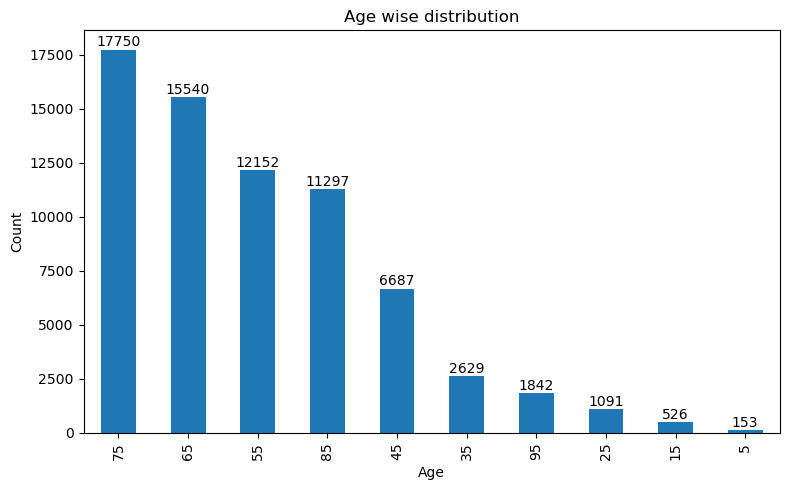

In [257]:
# Get value counts
age_counts = df['age_numeric'].value_counts()

# Create bar plot and capture Axes
ax = age_counts.plot(kind='bar', title='Age wise distribution', figsize=(8, 5))

# Add data labels on top of bars
for i, count in enumerate(age_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

diag_1, diag_2 and diag_3 contain ICD9 codes and there are many unique codes. We will group into diagnosis groups.
Group Names are
1-Circulatory
2-Respiratory
3-Digestive
4-Diabetes
5-Injury
6-Musculoskeletal
7-Genitourinary
8-Neoplasms
9-Other

Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Record
https://onlinelibrary.wiley.com/doi/10.1155/2014/781670

Table 2. Values of the primary diagnosis in the final dataset. In the analysis, groups that covered less than 3.5% of encounters were grouped into “other” category.


Text(0.5, 0, 'ICD-9 Diagnosis Code')

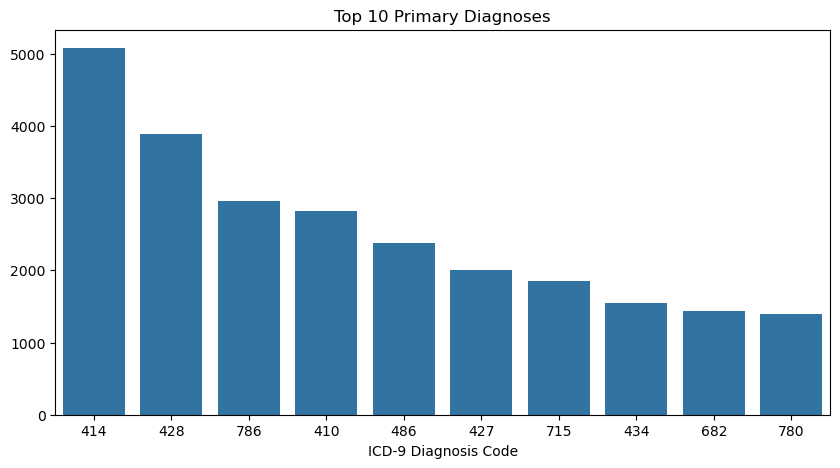

In [258]:
top_diag1 = df['diag_1'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_diag1.index.astype(str), y=top_diag1.values)
plt.title('Top 10 Primary Diagnoses')
plt.xlabel('ICD-9 Diagnosis Code')

In [260]:
df['diag_1'].nunique()

694

In [261]:
#Classification of ICD-9 Codes (International Classification of Diseases)

#function to categorize
def cat_diag(code):
    
    try:
        code_num = int(float(code))  # convert to integer
    except ValueError:
        return 'Other'
        
    if code.startswith('250'):
        return 'Diabetes'
    if 390 <= code_num <= 459 or code_num == 785:
        return 'Circulatory'
    elif 460 <= code_num <= 519 or code_num == 786:
        return 'Respiratory'
    elif 520 <= code_num <= 579 or code_num == 787:
        return 'Digestive'
    elif 580 <= code_num <= 629 or code_num == 788:
        return 'Genitourinary'
    elif 140 <= code_num <= 239:
        return 'Neoplasms'
    elif 710 <= code_num <= 739:
        return 'Musculoskeletal'
    elif 800 <= code_num <= 999:
        return 'Injury'
    else:
        return 'Other'

# Apply the function
df['diagnosis_1'] = df['diag_1'].apply(cat_diag)
df['diagnosis_2'] = df['diag_2'].apply(cat_diag)
df['diagnosis_3'] = df['diag_3'].apply(cat_diag)

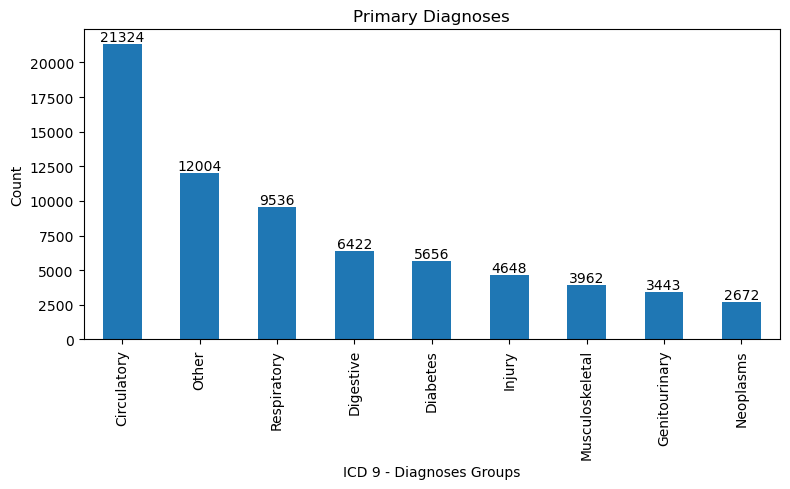

In [266]:

# Get value counts
diag_counts = df['diagnosis_1'].value_counts()

# Create bar plot and capture Axes
ax = diag_counts.plot(kind='bar', title='Primary Diagnoses', figsize=(8, 5))

# Add data labels on top of bars
for i, count in enumerate(diag_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.xlabel('ICD 9 - Diagnoses Groups')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [268]:
df[['diagnosis_1', 'diagnosis_2', 'diagnosis_3']].head()

,diagnosis_1,diagnosis_2,diagnosis_3
0,Diabetes,Other,Other
1,Other,Diabetes,Other
2,Other,Diabetes,Other
3,Other,Diabetes,Circulatory
4,Neoplasms,Neoplasms,Diabetes


In [270]:
for i in df[['diagnosis_1', 'diagnosis_2', 'diagnosis_3']]:
    print(f'{i}:\n{sorted(df[i].unique())}\n')

diagnosis_1:
['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', 'Injury', 'Musculoskeletal', 'Neoplasms', 'Other', 'Respiratory']

diagnosis_2:
['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', 'Injury', 'Musculoskeletal', 'Neoplasms', 'Other', 'Respiratory']

diagnosis_3:
['Circulatory', 'Diabetes', 'Digestive', 'Genitourinary', 'Injury', 'Musculoskeletal', 'Neoplasms', 'Other', 'Respiratory']



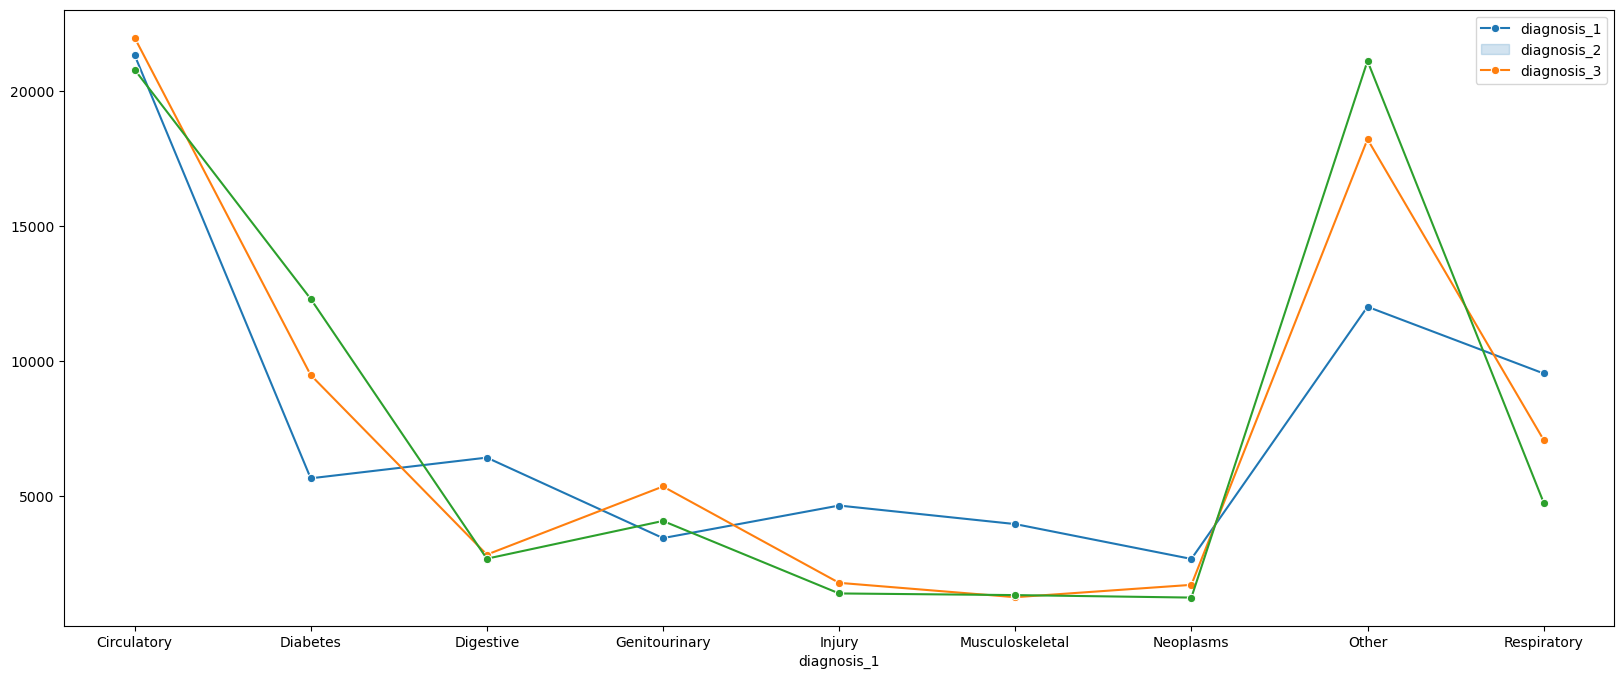

In [271]:
plt.figure(figsize=(20, 8))
for diag in ['diagnosis_1', 'diagnosis_2', 'diagnosis_3']:
    sns.lineplot(x=df[diag].value_counts().sort_index().index, y= df[diag].value_counts().sort_index().values, marker='o')
plt.legend(['diagnosis_1', 'diagnosis_2', 'diagnosis_3'])
plt.show()

Imputing the race

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


In [66]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [67]:
perc_unique = df['race'].value_counts()/len(df['race']) * 100

print(perc_unique)

race
Caucasian          74.778413
AfricanAmerican    18.876639
?                   2.233555
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: count, dtype: float64


In [63]:
#imputing missing values
df = df.replace('?', np.nan)



In [68]:
perc_unique = df['race'].value_counts()/len(df['race']) * 100

print(perc_unique)

race
Caucasian          74.778413
AfricanAmerican    18.876639
?                   2.233555
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: count, dtype: float64


In [60]:
imputer = SimpleImputer(strategy='most_frequent')
df['race'] = imputer.fit_transform(df[['race']]).ravel()

In [150]:
df['race'].value_counts()


race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [149]:
print(df['race'].value_counts()/len(df['race']) * 100)

race
Caucasian          74.778413
AfricanAmerican    18.876639
?                   2.233555
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: count, dtype: float64


In [ ]:
race_sample=df['race'].value_counts()/len(df['race']) * 100 

In [151]:
print(race_sample)

race
Caucasian          74.778413
AfricanAmerican    18.876639
?                   2.233555
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: count, dtype: float64


In [158]:
df_sample=[]
for v,i in race_sample.items():
    #print(v,i)
    if v != '?':
        #df_sample.append([v,int(2273 * i /100)])
        df_race='df_'+ v
        print(df_race)
        df_race = df[df['race'] == '?']['race'].sample(int(2273 * i /100), replace=True)

df_Caucasian
df_AfricanAmerican
df_Hispanic
df_Other
df_Asian


In [160]:
df_Caucasian = df[df['race'] == '?']['race'].sample(int(2273 * 74.77 /100), replace=True)

In [167]:
df_AfricanAmerican = df[df['race'] == '?']['race'].sample(429, replace=True)
df_Hispanic = df[df['race'] == '?']['race'].sample(45, replace=True)
df_Asian = df[df['race'] == '?']['race'].sample(14, replace=True)
df_Other = df[df['race'] == '?']['race'].sample(33, replace=True)


In [133]:
df_sample

[['Caucasian', 1699],
 ['AfricanAmerican', 429],
 ['?', 50],
 ['Hispanic', 45],
 ['Other', 33],
 ['Asian', 14]]

In [162]:
df_Caucasian.shape

(1699,)

In [169]:
print(df_Caucasian.shape)
print(df_AfricanAmerican.shape)
print(df_Hispanic.shape)
print(df_Asian.shape)
print(df_Other.shape)

(1699,)
(429,)
(45,)
(14,)
(33,)


In [172]:
for i in df_Caucasian.index:
    df['race'].iloc[i] = 'Caucasian'
for i in df_AfricanAmerican.index:
    df['race'].iloc[i] = 'AfricanAmerican'
for i in df_Hispanic.index:
    df['race'].iloc[i] = 'Hispanic'
for i in df_Asian.index:
    df['race'].iloc[i] = 'Asian'
for i in df_Other.index:
    df['race'].iloc[i] = 'Other'    




C:\Users\santh\AppData\Local\Temp\ipykernel_18368\724909729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race'].iloc[i] = 'Caucasian'
C:\Users\santh\AppData\Local\Temp\ipykernel_18368\724909729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race'].iloc[i] = 'Caucasian'
C:\Users\santh\AppData\Local\Temp\ipykernel_18368\724909729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race'].iloc[i] = 'Caucasian'
C:\U

In [175]:
df['race'] = df['race'].apply(lambda x:'Caucasian'if x=='?' else x)

In [176]:
print(df['race'].value_counts()/len(df['race']) * 100)

race
Caucasian          76.552090
AfricanAmerican    19.251027
Hispanic            2.041939
Other               1.511310
Asian               0.643633
Name: count, dtype: float64


In [82]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

Index([75, 65, 55, 85, 45, 35, 95, 25, 15, 5], dtype='int32', name='age_numeric')


Text(0.5, 0, 'Age')

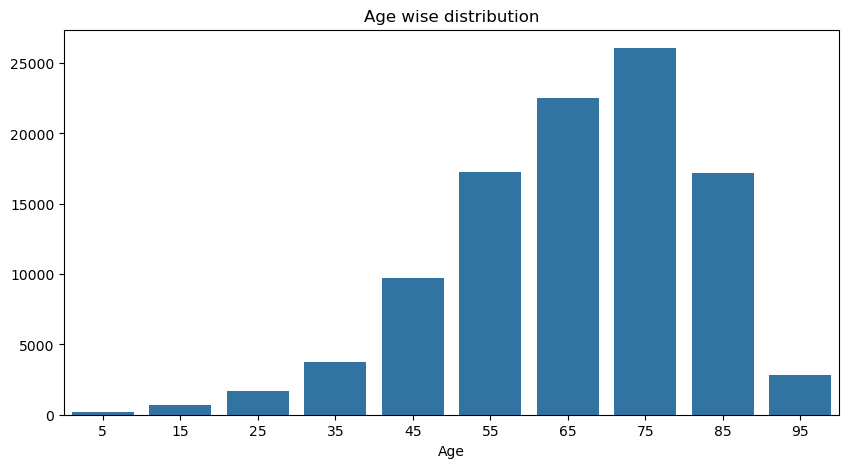

In [189]:
vc = df['age_numeric'].value_counts()
print(vc.index)
plt.figure(figsize=(10, 5))
sns.barplot(x=vc.index, y=vc.values)
plt.title('Age wise distribution')
plt.xlabel('Age')

<Axes: title={'center': 'Race wise distribution'}, xlabel='race'>

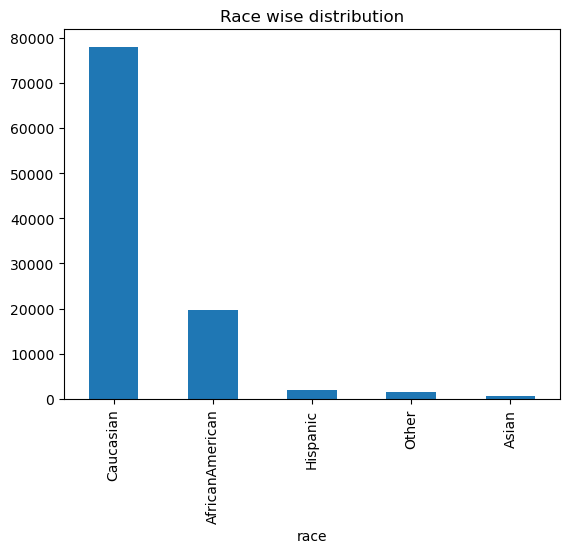

In [179]:
df['race'].value_counts().plot(kind='bar',title='Race wise distribution')

In [78]:
# Function to get the midpoint of a bin string
def range_to_midpoint(bin_str):
    parts = bin_str.strip('[)').split('-')
    return (int(parts[0]) + int(parts[1])) / 2

# Apply to column
df['age_numeric'] = df['age'].apply(range_to_midpoint).astype(int)

print(df['age_numeric'])

0          5
1         15
2         25
3         35
4         45
          ..
101761    75
101762    85
101763    75
101764    85
101765    75
Name: age_numeric, Length: 101766, dtype: int32


In [72]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Text(0.5, 0, 'ICD-9 Diagnosis Code')

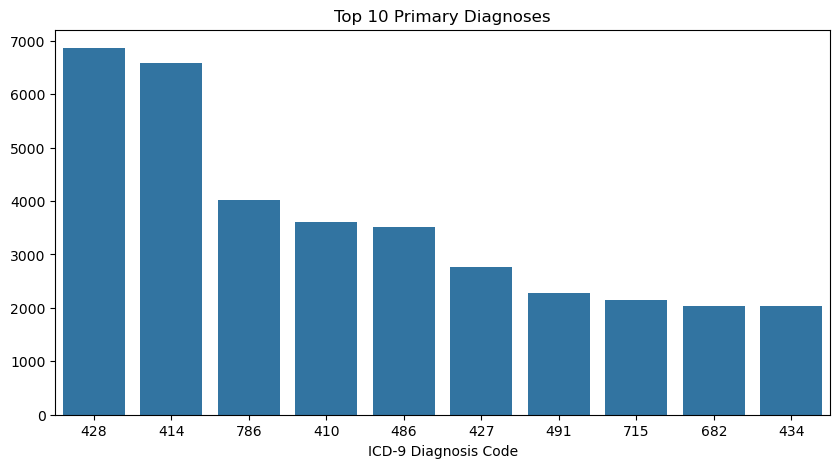

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

top_diag1 = df['diag_1'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_diag1.index.astype(str), y=top_diag1.values)
plt.title('Top 10 Primary Diagnoses')
plt.xlabel('ICD-9 Diagnosis Code')


In [181]:
print(df[['diag_1', 'diag_2', 'diag_3']])

        diag_1  diag_2 diag_3
0       250.83       ?      ?
1          276  250.01    255
2          648     250    V27
3            8  250.43    403
4          197     157    250
...        ...     ...    ...
101761  250.13     291    458
101762     560     276    787
101763      38     590    296
101764     996     285    998
101765     530     530    787

[101766 rows x 3 columns]


In [44]:
df['diag_1'].unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '432', '626', '295', '196',
       '250.6', '618', '182', '845', '423', '808', '250.4', '722', '403',
       '250.11', '784', '707', '440', '151', '715', '997', '198', '564',
       '812', '38', '590', '556', '578', '250.32', '433', 'V58', '569',
       '185', '536', '255', '250.13', '599', '558', '574', '491', '560',
       '244', '250.03', '577', '730', '188', '824', '250.8', '332', '562',
       '291', '296', '510', '401', '263', '438', '70', '250.02', '493',
       '642', '625', '571', '738', '593', '250.42', '807', '456', '446',
       '575', '250.41', '820', '515', '780', '250.22', '995', '235',
       '250.82', '721', '787', '162', '724', '282', '514', 'V55', '281',
       '250.33', '530', '466', '435', '250.12', 'V53', '789', '

In [185]:
df['diag_1'].nunique() #Count the number of unique values

717

In [193]:
df[df['diag_1'].str.startswith('250')]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_numeric
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,5
10,28236,89869032,AfricanAmerican,Female,[40-50),?,1,1,7,9,...,Steady,No,No,No,No,No,No,Yes,>30,45
52,590346,37746639,AfricanAmerican,Female,[40-50),?,1,6,7,8,...,Steady,No,No,No,No,No,No,Yes,>30,45
56,630342,93232917,AfricanAmerican,Female,[50-60),?,3,6,2,9,...,Steady,No,No,No,No,No,No,Yes,>30,55
60,676422,63754317,AfricanAmerican,Female,[70-80),?,1,1,7,4,...,Steady,No,No,No,No,No,No,Yes,>30,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101728,443710592,84391839,Caucasian,Female,[30-40),?,1,1,7,5,...,No,No,No,No,No,No,No,Yes,>30,35
101731,443724206,124767527,Caucasian,Male,[50-60),?,1,1,7,4,...,Up,No,No,No,No,No,Ch,Yes,NO,55
101742,443787512,52419276,Caucasian,Male,[70-80),?,2,6,2,4,...,Steady,No,No,No,No,No,Ch,Yes,NO,75
101753,443841992,184875899,Other,Male,[40-50),?,1,1,7,13,...,Down,No,No,No,No,No,Ch,Yes,NO,45


In [194]:
df[(df['diag_1'] == '?') & (df['diag_2'] == '?')]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_numeric
87181,277875756,6734736,Asian,Male,[60-70),?,2,13,4,7,...,No,No,No,No,No,No,No,No,NO,65


In [183]:
df_i = pd.read_csv('ICD9 Classification.csv')
df_i

,CodeF,CodeL,Code,Description,Range
0,1,139,1,INFECTIOUS AND PARASITIC DISEASES,001-139
1,140,239,2,NEOPLASMS,140-239
2,240,279,3,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES...",240-279
3,280,289,4,DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS,280-289
4,290,319,5,"MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DIS...",290-319
5,320,389,6,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,320-389
6,390,459,7,DISEASES OF THE CIRCULATORY SYSTEM,390-459
7,460,519,8,DISEASES OF THE RESPIRATORY SYSTEM,460-519
8,520,579,9,DISEASES OF THE DIGESTIVE SYSTEM,520-579
9,580,629,10,DISEASES OF THE GENITOURINARY SYSTEM,580-629


In [14]:
# Convert categorical data to numerical data using LabelEncoder
le = LabelEncoder()
df['insulin'] = le.fit_transform(df['insulin'])

In [16]:
df['insulin']

0         1
1         3
2         1
3         3
4         2
         ..
101761    0
101762    2
101763    0
101764    3
101765    1
Name: insulin, Length: 101766, dtype: int32

In [27]:
print('Encoding Categorical Values')
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype=='O':
        df[col] = le.fit_transform(df[col])
        



Encoding Categorical Values


In [97]:
#Classification of ICD-9 Codes (International Classification of Diseases)

#function to categorize
def cat_diag(code):
    if code.startswith('?'):
        return 'Diabetes'
    try:
        code_num = int(float(code))  # convert to integer
    except ValueError:
        return 'Other'
        
    if code.startswith('250'):
        return 'Diabetes'
    if 390 <= code_num <= 459 or code_num == 785:
        return 'Circulatory'
    elif 460 <= code_num <= 519 or code_num == 786:
        return 'Respiratory'
    elif 520 <= code_num <= 579 or code_num == 787:
        return 'Digestive'
    elif 580 <= code_num <= 629 or code_num == 788:
        return 'Genitourinary'
    elif 140 <= code_num <= 239:
        return 'Neoplasms'
    elif 710 <= code_num <= 739:
        return 'Musculoskeletal'
    elif 800 <= code_num <= 999:
        return 'Injury'
    else:
        return 'Other'

# Apply the function
df['diagnosis_1'] = df['diag_1'].apply(cat_diag)
df['diagnosis_2'] = df['diag_2'].apply(cat_diag)
df['diagnosis_3'] = df['diag_3'].apply(cat_diag)

In [98]:
df['diagnosis_1'],df['diagnosis_2'],df['diagnosis_3']

(0          Diabetes
 1             Other
 2             Other
 3             Other
 4         Neoplasms
             ...    
 101761     Diabetes
 101762    Digestive
 101763        Other
 101764       Injury
 101765    Digestive
 Name: diagnosis_1, Length: 101766, dtype: object,
 0              Diabetes
 1              Diabetes
 2              Diabetes
 3              Diabetes
 4             Neoplasms
               ...      
 101761            Other
 101762            Other
 101763    Genitourinary
 101764            Other
 101765        Digestive
 Name: diagnosis_2, Length: 101766, dtype: object,
 0            Diabetes
 1               Other
 2               Other
 3         Circulatory
 4            Diabetes
              ...     
 101761    Circulatory
 101762      Digestive
 101763          Other
 101764         Injury
 101765      Digestive
 Name: diagnosis_3, Length: 101766, dtype: object)

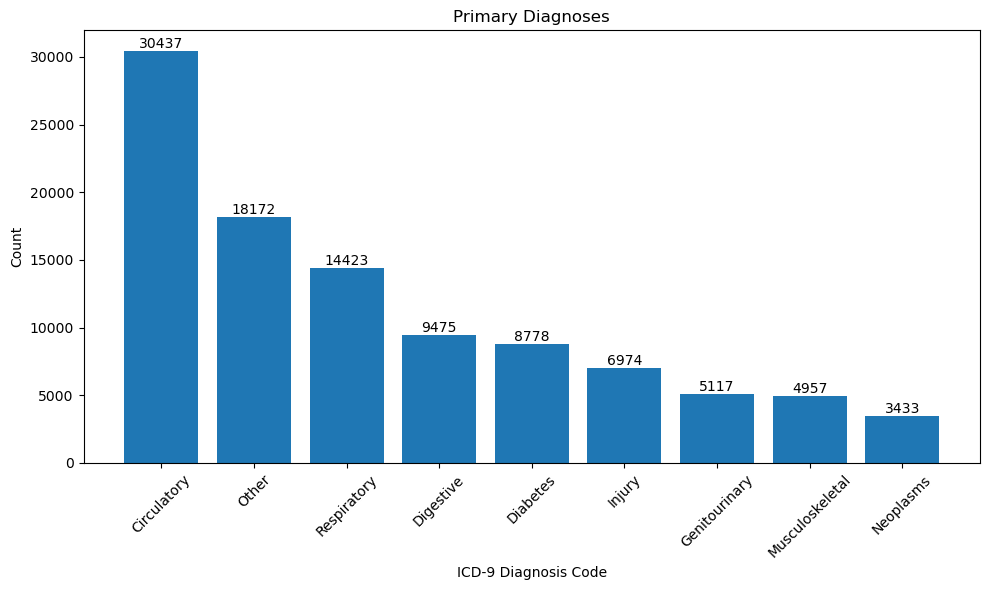

In [99]:
diag1 = df['diagnosis_1'].value_counts().head(10)

plt.figure(figsize=(10, 6))  # set figure size first
plt.bar(diag1.index.astype(str), diag1.values)

plt.title('Primary Diagnoses')
plt.xlabel('ICD-9 Diagnosis Code')
plt.ylabel('Count')

# Add data labels on top of each bar
for i in range(len(diag1)):
    plt.text(i, diag1.values[i] + 1, str(diag1.values[i]), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [101]:
df[df['diag_2']=='?']

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diagnosis_1,diagnosis_2,diagnosis_3
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,NO,Diabetes,Diabetes,Diabetes
66,715086,3376278,Caucasian,Male,[10-20),?,1,5,7,1,...,No,No,No,No,Ch,Yes,NO,Diabetes,Diabetes,Diabetes
216,2735964,2359485,Caucasian,Female,[0-10),?,6,25,7,3,...,No,No,No,No,No,Yes,NO,Diabetes,Diabetes,Diabetes
263,2948334,3425292,AfricanAmerican,Female,[30-40),?,6,25,1,2,...,No,No,No,No,No,No,NO,Diabetes,Diabetes,Diabetes
431,3902532,4893183,AfricanAmerican,Female,[20-30),?,6,25,7,2,...,No,No,No,No,Ch,Yes,>30,Diabetes,Diabetes,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99621,415526432,43332570,Caucasian,Male,[70-80),?,1,1,7,2,...,No,No,No,No,No,Yes,>30,Circulatory,Diabetes,Circulatory
100559,427825172,39827439,Caucasian,Female,[70-80),?,1,22,7,2,...,No,No,No,No,Ch,Yes,<30,Genitourinary,Diabetes,Other
100787,430828958,146717159,Caucasian,Female,[0-10),?,3,1,1,3,...,No,No,No,No,No,Yes,NO,Diabetes,Diabetes,Diabetes
101192,436145102,105360030,Caucasian,Male,[80-90),?,1,3,7,2,...,No,No,No,No,Ch,Yes,>30,Other,Diabetes,Diabetes


In [77]:
df['diag_1'].str.startswith('250').value_counts()

diag_1
False    93009
True      8757
Name: count, dtype: int64

In [76]:
df['diag_1'].value_counts()

diag_1
428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
373       1
314       1
684       1
217       1
V51       1
Name: count, Length: 717, dtype: int64

In [79]:
df['diagnosis_1'].value_counts()

diagnosis_1
Circulatory        30437
Other              18193
Respiratory        14423
Digestive           9475
Diabetes            8757
Injury              6974
Genitourinary       5117
Musculoskeletal     4957
Neoplasms           3433
Name: count, dtype: int64